## İş Problemi

Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak seviye tabanlı (levelbased) yeni müşteri tanımları (persona) oluşturmak ve bu yeni müşteri tanımlarına göre segmentler oluşturup bu segmentlere göre yeni gelebilecek müşterilerin şirkete ortalama ne kadar kazandırabileceğini tahmin etmek istemektedir. Örneğin:Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek kullanıcının ortalama ne kadar kazandırabileceği belirlenmek isteniyor.


## Veri Seti Hikayesi

Persona.csv veriseti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. Veriseti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir.

### Görev 1: Aşağıdaki Soruları Yanıtlayınız

Soru 1: persona.csvdosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("persona.csv")
df

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17
...,...,...,...,...,...
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [3]:
df.shape

(5000, 5)

Soru 2: Kaç uniqueSOURCE vardır? Frekansları nedir?

In [4]:
df["SOURCE"].unique()

array(['android', 'ios'], dtype=object)

In [5]:
df["SOURCE"].nunique()

2

In [6]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

Soru 3:Kaç uniquePRICE vardır?

In [7]:
df["PRICE"].nunique()

6

Soru 4:Hangi PRICE'dankaçar tane satış gerçekleşmiş?

In [8]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

<Axes: xlabel='PRICE', ylabel='count'>

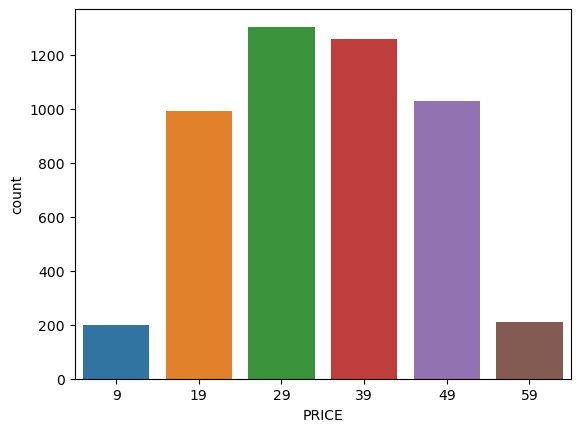

In [9]:
sns.countplot(x="PRICE",data=df)

Soru 5:Hangi ülkeden kaçar tane satış olmuş?

In [10]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

<Axes: xlabel='COUNTRY', ylabel='count'>

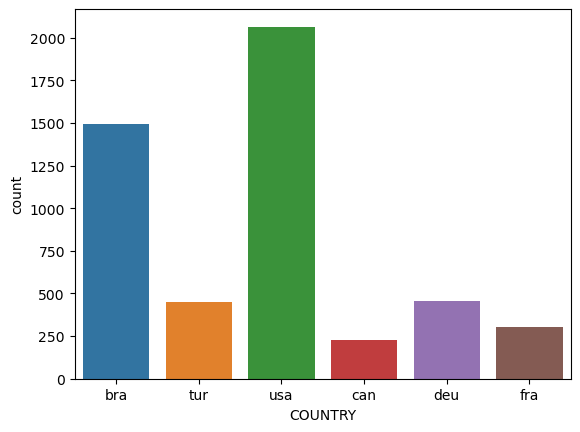

In [11]:
sns.countplot(x="COUNTRY",data=df)

Soru 6:Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [12]:
df.groupby("COUNTRY").agg({"PRICE":"sum"})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


Soru 7:SOURCE türlerine göre satışsayıları nedir?

In [13]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

Soru 8:Ülkelere göre PRICE ortalamaları nedir?

In [14]:
df.groupby("COUNTRY").agg({"PRICE":"mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


Soru 9:SOURCE'laragöre PRICE ortalamaları nedir?

In [15]:
df.groupby("SOURCE").agg({"PRICE":"mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


Soru 10: COUNTRY-SOURCE kırılımındaPRICE ortalamaları nedir?

In [16]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

### Görev 2:  COUNTRY, SOURCE, SEX, AGE kırılımındaortalama kazançlar nedir?

In [17]:
df.groupby(["COUNTRY","SOURCE","SEX", "AGE" ]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

### Görev 3:  ÇıktıyıPRICE’agöre sıralayınız.

In [18]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX", "AGE" ]).agg({"PRICE":"mean"}).sort_values(by="PRICE", ascending=False)
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

### Görev 4:  Indeksteyer alan isimleri değişken ismine çeviriniz.

Üçüncü sorunun çıktısında yer alan PRICE dışındaki tüm değişkenler indexisimleridir. Bu isimleri değişken isimlerine çeviriniz

In [19]:
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

In [20]:
agg_df = agg_df.reset_index()

In [21]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


### Görev 5:  Age değişkenini kategorik değişkene çeviriniz ve agg_df’eekleyiniz.

In [22]:
my_bins=[0,18,23,30,40,agg_df["AGE"].max()]

In [23]:
my_labels=["0_18","19_23","24_30","31_40","40_" + str(agg_df["AGE"].max())]

In [24]:
agg_df["AGE_CUT"] = pd.cut(agg_df["AGE"],bins=my_bins,labels=my_labels)

In [25]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CUT
0,bra,android,male,46,59.0,40_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,0_18


### ReservedGörev 6:  Yeni seviye tabanlı müşterileri (persona) tanımlayınız.

In [26]:
agg_df.drop(["AGE","PRICE"],axis=1).values

array([['bra', 'android', 'male', '40_66'],
       ['usa', 'android', 'male', '31_40'],
       ['fra', 'android', 'female', '24_30'],
       ...,
       ['can', 'android', 'female', '24_30'],
       ['fra', 'android', 'male', '0_18'],
       ['deu', 'android', 'male', '24_30']], dtype=object)

In [27]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CUT
0,bra,android,male,46,59.0,40_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,0_18


In [28]:
agg_df["CUSTOMER_LEVEL_BASED"] =  ["_".join(i).upper() for i in agg_df.drop(["AGE","PRICE"],axis=1).values]

In [29]:
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CUT,CUSTOMER_LEVEL_BASED
0,bra,android,male,46,59.0,40_66,BRA_ANDROID_MALE_40_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40
...,...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40,USA_IOS_FEMALE_31_40
344,usa,ios,female,30,19.0,24_30,USA_IOS_FEMALE_24_30
345,can,android,female,27,19.0,24_30,CAN_ANDROID_FEMALE_24_30
346,fra,android,male,18,19.0,0_18,FRA_ANDROID_MALE_0_18


In [30]:
agg_df.drop(["COUNTRY","SOURCE","SEX","AGE","AGE_CUT"],axis=1,inplace=True)

In [31]:
agg_df

,PRICE,CUSTOMER_LEVEL_BASED
0,59.0,BRA_ANDROID_MALE_40_66
1,59.0,USA_ANDROID_MALE_31_40
2,59.0,FRA_ANDROID_FEMALE_24_30
3,54.0,USA_IOS_MALE_31_40
4,49.0,DEU_ANDROID_FEMALE_31_40
...,...,...
343,19.0,USA_IOS_FEMALE_31_40
344,19.0,USA_IOS_FEMALE_24_30
345,19.0,CAN_ANDROID_FEMALE_24_30
346,19.0,FRA_ANDROID_MALE_0_18


In [32]:
agg_df = agg_df.groupby("CUSTOMER_LEVEL_BASED")["PRICE"].mean().reset_index()

In [33]:
agg_df

,CUSTOMER_LEVEL_BASED,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_40_66,36.737179
...,...,...
104,USA_IOS_MALE_0_18,33.983495
105,USA_IOS_MALE_19_23,34.901872
106,USA_IOS_MALE_24_30,34.838143
107,USA_IOS_MALE_31_40,36.206324


### Görev 7:  Yeni müşterileri (personaları) segmentlereayırınız.

In [34]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"],4,labels=["D","C","B","A"])
agg_df

,CUSTOMER_LEVEL_BASED,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_40_66,36.737179,A
...,...,...,...
104,USA_IOS_MALE_0_18,33.983495,C
105,USA_IOS_MALE_19_23,34.901872,B
106,USA_IOS_MALE_24_30,34.838143,B
107,USA_IOS_MALE_31_40,36.206324,A


In [35]:
agg_df.groupby("SEGMENT").agg({"PRICE":["mean","max","sum"]})

PRICE                        
              mean        max          sum
SEGMENT                                   
D        29.206780  32.333333   817.789833
C        33.509674  34.077340   904.761209
B        34.999645  36.000000   944.990411
A        38.691234  45.428571  1044.663328

### Görev 8:  Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini  tahmin ediniz.

•33 yaşında ANDROID kullanan bir Türk kadını hangi segmenteaittir ve ortalama ne kadar gelir kazandırması beklenir?•35 yaşında IOS kullanan bir Fransız kadını hangi segmenteaittir ve ortalama ne kadar gelir kazandırması beklenir?

In [36]:
user = "TUR_ANDROID_FEMALE_31_40"


In [37]:
agg_df[agg_df["CUSTOMER_LEVEL_BASED"]==user ]["PRICE"]

72    41.833333
Name: PRICE, dtype: float64

In [38]:
user2="FRA_IOS_FEMALE_31_40"

In [39]:
agg_df[agg_df["CUSTOMER_LEVEL_BASED"]==user2 ]["PRICE"]

63    32.818182
Name: PRICE, dtype: float64